/Users/sachaichbiah/opt/anaconda3/lib/python3.8/site-packages/IO-1.0-py3.8.egg/IO/IO.py:24: UserWarning: KLB library is not installed


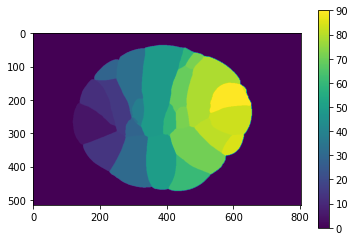

In [1]:
import skimage.io as io 
import matplotlib.pyplot as plt
from IO import imread as inrimread
from time import time
import numpy as np

def make_index_right(n): 
    return(("0000000"+str(n))[-3:])

folder = "Phallusia_temp/"
base_label = "/Users/sachaichbiah/Documents/PHD/Data/Ascidians_lemaire_lightsheet/PM1/Post/POST/POST_RELEASE/Astec-Pm1_post_t"
base_raw = "/Users/sachaichbiah/Documents/PHD/Data/Ascidians_lemaire_lightsheet/PM1/Fuse/Astec-pm1/FUSE/FUSE_RELEASE/Astec-pm1_fuse_t"
t=1
labels = np.array(inrimread(base_label + make_index_right(t) + ".inr.gz"))-1
image = np.array(inrimread(base_raw + make_index_right(t) + ".inr.gz"))
plt.imshow(labels[300])
plt.colorbar()

In [2]:
from delaunay_watershed_3d import geometry_reconstruction_3d

def make_idx(n): 
    return(("000"+str(n))[-3:])

dist = 7
DW = geometry_reconstruction_3d(labels,min_dist = dist, expansion_labels =0,mode='torch',print_info=True,original_image = image)

Mode == Torch
Kernel size = 7
Computing EDT ...
EDT computed in  63.57
Searching local extremas ...
Number of local minimas : 34501
Number of local maxes : 287
Local minimas computed in  243.2
Starting triangulation..
Triangulation build in  1.05
Graph build in  11.222
Watershed done in  14.137


In [3]:
#v = DW.plot_in_napari()

In [ ]:
from skimage.segmentation import expand_labels
from delaunay_watershed_3d import reconstruct_mask_from_dict
DW.export_segmentation("Dict_mask.npy")
labels = reconstruct_mask_from_dict("Dict_mask.npy")
#v = napari.view_image(labels)
#plt.figure(figsize=(20,20))
#plt.imshow(expand_labels(reconstruct_mask_from_dict("Dict_mask.npy"),0),plt.cm.nipy_spectral)

In [ ]:
import sys
import numpy as np 
D = np.load("Dict_mask.npy",allow_pickle=True).item()
Dict_memory_footprint = D['Verts'].nbytes + D['Faces'].nbytes + D['seeds'].nbytes + D['image_shape'].nbytes
print("Size of Delaunay-Watershed data:",Dict_memory_footprint,"bytes")
print("Size of the labels:",labels.nbytes,"bytes")
print("Relative size:", Dict_memory_footprint/labels.nbytes)